In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("jobs_in_data.csv")
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [4]:
columns_to_drop = ['salary', 'salary_currency', 'job_category','work_year','company_size','employment_type','employee_residence']
df.drop(columns=columns_to_drop, inplace=True)

In [5]:
df.rename(columns={'salary_in_usd': 'salary'}, inplace=True)

In [6]:
df['work_setting'] = df['work_setting'].replace('In-person', 'Office')

In [7]:
df.head()

,job_title,salary,experience_level,work_setting,company_location
0,Data DevOps Engineer,95012,Mid-level,Hybrid,Germany
1,Data Architect,186000,Senior,Office,United States
2,Data Architect,81800,Senior,Office,United States
3,Data Scientist,212000,Senior,Office,United States
4,Data Scientist,93300,Senior,Office,United States


In [8]:
df['job_title'].value_counts()

job_title
Data Engineer                     2195
Data Scientist                    1989
Data Analyst                      1388
Machine Learning Engineer          991
Applied Scientist                  272
                                  ... 
Consultant Data Engineer             1
Sales Data Analyst                   1
Managing Director Data Science       1
AWS Data Architect                   1
Deep Learning Researcher             1
Name: count, Length: 125, dtype: int64

In [9]:
df.head()

,job_title,salary,experience_level,work_setting,company_location
0,Data DevOps Engineer,95012,Mid-level,Hybrid,Germany
1,Data Architect,186000,Senior,Office,United States
2,Data Architect,81800,Senior,Office,United States
3,Data Scientist,212000,Senior,Office,United States
4,Data Scientist,93300,Senior,Office,United States


In [10]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [11]:
country_map = shorten_categories(df['job_title'].value_counts(), 150)
df.loc[:, 'job_title'] = df['job_title'].map(country_map)
print(df['job_title'].value_counts())

job_title
Data Engineer                2195
Data Scientist               1989
Other                        1782
Data Analyst                 1388
Machine Learning Engineer     991
Applied Scientist             272
Research Scientist            269
Analytics Engineer            256
Data Architect                213
Name: count, dtype: int64


In [12]:
df['company_location'].value_counts()

company_location
United States     8132
United Kingdom     449
Canada             226
Spain              113
Germany             72
                  ... 
Gibraltar            1
Ecuador              1
Andorra              1
Mauritius            1
Malta                1
Name: count, Length: 70, dtype: int64

In [13]:
country_map = shorten_categories(df['company_location'].value_counts(), 20)
df.loc[:, 'company_location'] = df['company_location'].map(country_map)
print(df['company_location'].value_counts())

company_location
United States     8132
United Kingdom     449
Other              244
Canada             226
Spain              113
Germany             72
France              50
Portugal            24
Australia           24
Netherlands         21
Name: count, dtype: int64


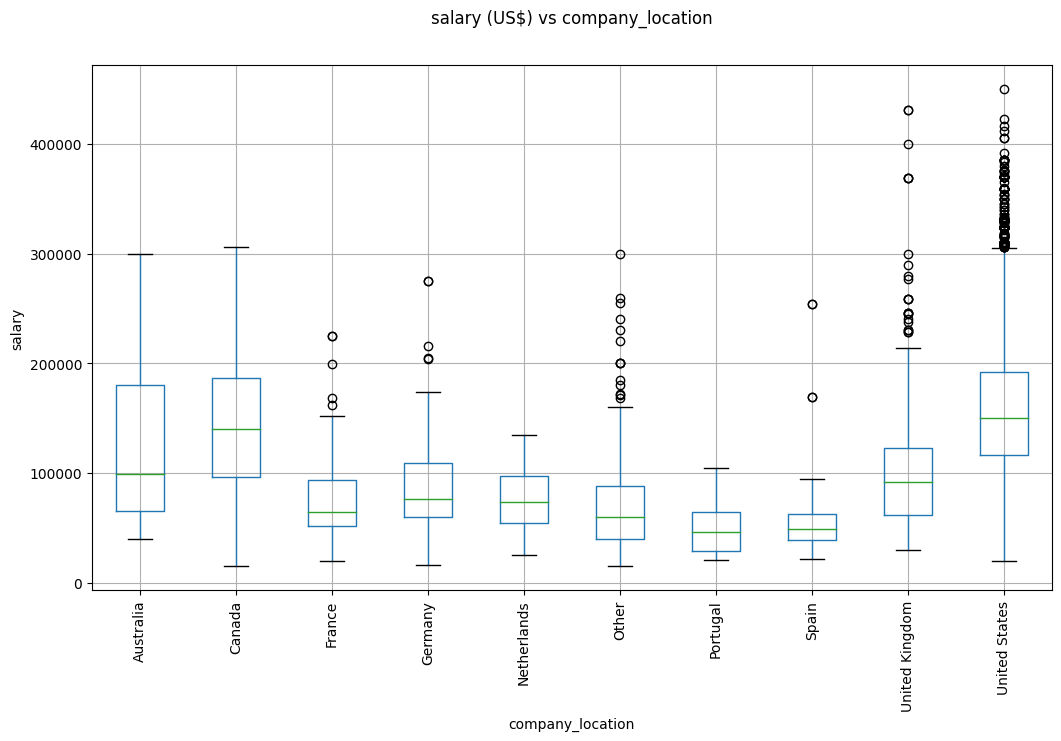

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('salary', 'company_location', ax=ax)
plt.suptitle('salary (US$) vs company_location')
plt.title('')
plt.ylabel('salary')
plt.xticks(rotation=90)
plt.show()

In [15]:
df["job_title"].unique()

array(['Other', 'Data Architect', 'Data Scientist', 'Data Engineer',
       'Machine Learning Engineer', 'Data Analyst', 'Analytics Engineer',
       'Applied Scientist', 'Research Scientist'], dtype=object)

In [16]:
df["experience_level"].unique()

array(['Mid-level', 'Senior', 'Executive', 'Entry-level'], dtype=object)

In [17]:
df["work_setting"].unique()

array(['Hybrid', 'Office', 'Remote'], dtype=object)

In [18]:
df["company_location"].unique()

array(['Germany', 'United States', 'United Kingdom', 'Canada', 'Spain',
       'Other', 'France', 'Netherlands', 'Portugal', 'Australia'],
      dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder
le_job_title = LabelEncoder()
df['job_title'] = le_job_title.fit_transform(df['job_title'])
df["job_title"].unique()

array([7, 3, 5, 4, 6, 2, 0, 1, 8])

In [20]:
le_experience_level = LabelEncoder()
df['experience_level'] = le_experience_level.fit_transform(df['experience_level'])
df['experience_level'].unique()

array([2, 3, 1, 0])

In [21]:
le_work_setting = LabelEncoder()
df['work_setting'] = le_work_setting.fit_transform(df['work_setting'])
df['work_setting'].unique()

array([0, 1, 2])

In [22]:
le_company_location = LabelEncoder()
df['company_location'] = le_company_location.fit_transform(df['company_location'])
df['company_location'].unique()

array([3, 9, 8, 1, 7, 5, 2, 4, 6, 0])

In [23]:
x= df.drop("salary", axis=1)
y = df["salary"]

In [24]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x, y.values)

LinearRegression()

In [25]:
y_pred = linear_reg.predict(x)

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [27]:
error

58687.30609205256

In [28]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(x, y.values)

DecisionTreeRegressor(random_state=0)

In [29]:
y_pred = dec_tree_reg.predict(x)

In [30]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$50,674.71


In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(x, y)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [32]:
regressor = gs.best_estimator_

regressor.fit(x, y.values)
y_pred = regressor.predict(x)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$51,871.07


In [33]:
x

,job_title,experience_level,work_setting,company_location
0,7,2,0,3
1,3,3,1,9
2,3,3,1,9
3,5,3,1,9
4,5,3,1,9
...,...,...,...,...
9350,7,3,2,9
9351,5,3,2,9
9352,7,2,2,9
9353,5,0,2,9


In [34]:
# country, edlevel, yearscode
x = np.array([["Data Architect","Senior", 'Office', "United States" ]])
x

array([['Data Architect', 'Senior', 'Office', 'United States']],
      dtype='<U14')

In [35]:
x[:, 0] = le_job_title.transform(x[:,0])
x[:, 1] = le_experience_level.transform(x[:,1])
x[:, 2] = le_work_setting.transform(x[:,2])
x[:, 3] = le_company_location.transform(x[:,3])
x = x.astype(float)
x

array([[3., 3., 1., 9.]])

In [36]:
y_pred = regressor.predict(x)
y_pred

c:\Users\N\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([170176.73595506])

In [37]:
import pickle

In [38]:
data = {"model": regressor, "le_job_title": le_job_title, "le_experience_level": le_experience_level, "le_work_setting": le_work_setting, "le_company_location": le_company_location}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [39]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_job_title = data["le_job_title"]
le_experience_level = data["le_experience_level"]
le_work_setting = data["le_work_setting"]
le_company_location = data["le_company_location"]

In [40]:
y_pred = regressor_loaded.predict(x)
y_pred

c:\Users\N\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([170176.73595506])